In [1]:
# LIBRERÍAS
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Importar los datos
df = pd.read_csv('train.csv',index_col = "PassengerId")

In [28]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
# Observamos cuál es el tamaño de la muestra
df.shape

(891, 11)

In [30]:
# Observamos la cantidad de NaNs en nuestros datos
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [31]:
# El variable de las cabañas tiene demasiados NaNs, por esta razón lo elimnaremos.
df = df.drop('Cabin',axis=1)

In [32]:
# Quitamos el variable de embarked porque también 2 solamente, nuestro tamaño de muestra es considerable de todas maneras.
# La variable "Age" de la edad tiene 177 NaNs, la mejor opción es quitarlos ya que el factor de la edad 
# si puede llegar a ser muy relevante para saber si un pasajero murió o no.

df = df.dropna()

In [33]:
#Contamos los NaNs
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [34]:
# Vemos el cambio en nuestro tamaño de muestra
df.shape

(712, 10)

In [35]:
# 1ra etapa de datos filtrados
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [40]:
# Datos irrelevantes
df = df.drop(['Name','Ticket','Fare'],axis = 1)

In [43]:
# Para reducir las dimensiones de nuestro dataset. 
# Podemos sumar la columna de los hermanos y papás ('Sibsp' y 'Parch') y eliminarlas
# Si la persona va sola se agrega 1

# Realizamos esto para obserar si un variable importante para la superviviencia es la cantidad de familia.
df['Total ppl'] = df['Parch'] + df['SibSp'] + 1
df = df.drop(['Parch','SibSp'],axis=1)

In [44]:
# Vemos la 2da etapa de filtración de datos
df.head()

,Survived,Pclass,Sex,Age,Embarked,Total ppl
PassengerId,,,,,,
1,0,3,male,22.0,S,2
2,1,1,female,38.0,C,2
3,1,3,female,26.0,S,1
4,1,1,female,35.0,S,2
5,0,3,male,35.0,S,1


In [47]:
# Queremos categorizar las edades ya que nuestro resultado es binario
# Para esto debemos encontrar un rango de los edades
# Posterior a esto los ponemos en sus respectivas categorías y quitamos la columna de edad.

for i in df:
    df['Age Category'] = pd.cut(df['Age'],bins=[0,5,12,18,35,60,81], \
                             labels = ['Bebe', 'Niño','Adolescente','Adulto Joven','Adulto Mayor','Anciano'])

df=df.drop('Age',axis=1)

In [48]:
# Visualización de la 3ra etapa de filtración de datos
df.head(5)

,Survived,Pclass,Sex,Embarked,Total ppl,Age Category
PassengerId,,,,,,
1,0,3,male,S,2,Adulto Joven
2,1,1,female,C,2,Adulto Mayor
3,1,3,female,S,1,Adulto Joven
4,1,1,female,S,2,Adulto Joven
5,0,3,male,S,1,Adulto Joven


<AxesSubplot:xlabel='Total ppl', ylabel='Survived'>

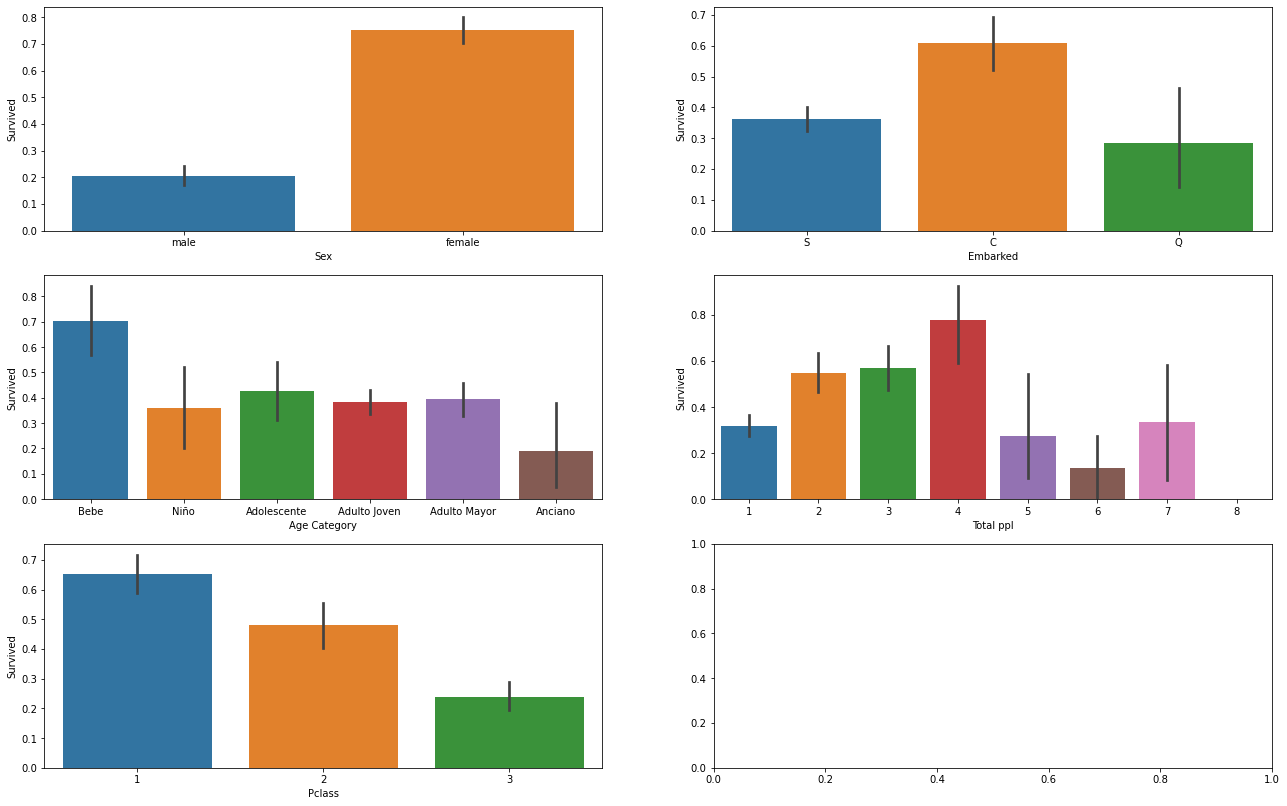

In [51]:
# Visualizaciión de los datos
fig, axes = plt.subplots(3, 2, figsize=(22,14))

sns.barplot(x='Sex', y='Survived', data=df, ax=axes[0, 0])
sns.barplot(x='Age Category', y='Survived', data=df, ax=axes[1, 0])
sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[2, 0])
sns.barplot(x='Embarked', y='Survived', data=df, ax=axes[0, 1])
sns.barplot(x='Total ppl', y='Survived', data=df, ax=axes[1, 1])

<AxesSubplot:xlabel='PassengerId', ylabel='Total ppl'>

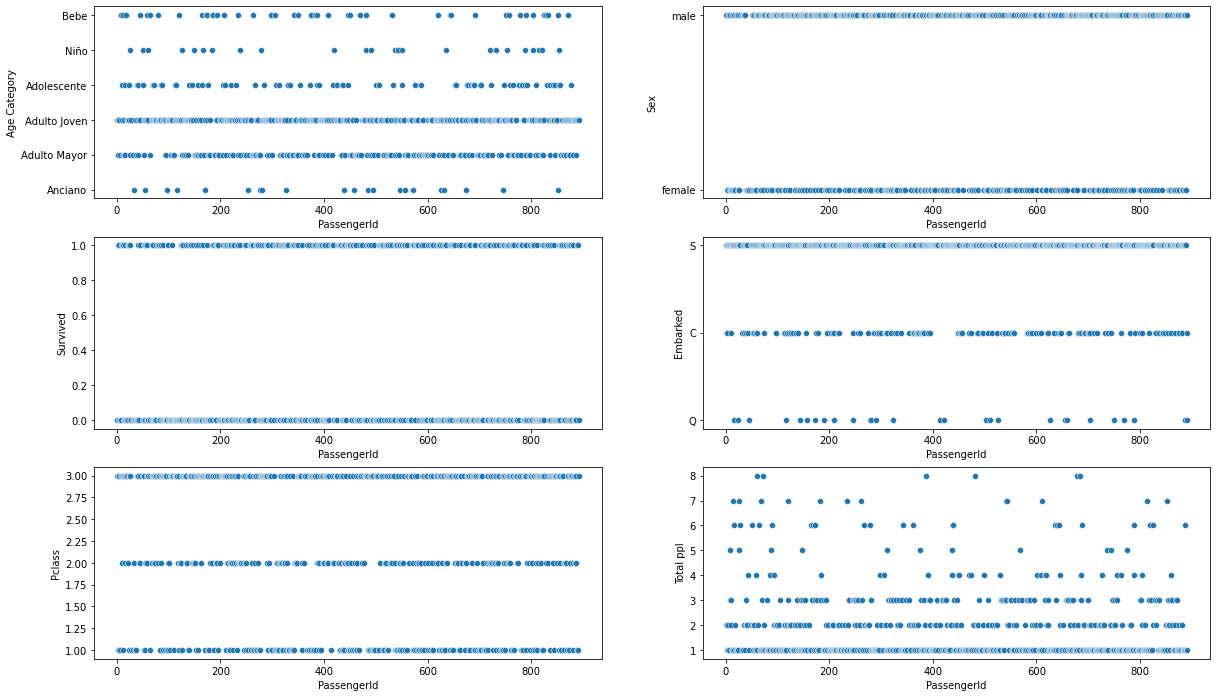

In [53]:
# Para asegurarnos que no hay outliers, realizamos lo siguiente:
fig, axes = plt.subplots(3, 2, figsize=(20,12))
sns.scatterplot(x='PassengerId', y='Age Category', data=df, ax=axes[0, 0])
sns.scatterplot(x='PassengerId', y='Survived', data=df, ax=axes[1, 0])
sns.scatterplot(x='PassengerId', y='Pclass', data=df, ax=axes[2, 0])
sns.scatterplot(x='PassengerId', y='Sex', data=df, ax=axes[0, 1])
sns.scatterplot(x='PassengerId', y='Embarked', data=df, ax=axes[1, 1])
sns.scatterplot(x='PassengerId', y='Total ppl', data=df, ax=axes[2, 1])

In [54]:
# Hemos realizado la clasificación de los datos ahora los convertiremos a dummies para tener un dato numérico.
df = pd.get_dummies(df, columns = ["Sex"], drop_first = False)
df = pd.get_dummies(df, columns = ["Age Category"], drop_first = False)
df = pd.get_dummies(df, columns = ["Pclass"], drop_first = False)
df = pd.get_dummies(df, columns = ["Embarked"], drop_first = False)

In [55]:
# Visualización
df.head()

,Survived,Total ppl,Sex_female,Sex_male,Age Category_Bebe,Age Category_Niño,Age Category_Adolescente,Age Category_Adulto Joven,Age Category_Adulto Mayor,Age Category_Anciano,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,
1,0,2,0,1,0,0,0,1,0,0,0,0,1,0,0,1
2,1,2,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1
4,1,2,1,0,0,0,0,1,0,0,1,0,0,0,0,1
5,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1


In [56]:
# Queremos implementar nuestro modelo de random forest por lo tanto debemos agregar el archivo de prueba
df_test = pd.read_csv('test.csv',index_col = 'PassengerId')
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
# Vemos las dimensiones de nuestra muestra, hay una columna menos porque no viene la columna de 'Survived'. 
# Justamente porque queremos probar nuestro modelo
df_test.shape

(418, 10)

In [59]:
#Realizamos la misma filtración de datos que previamente establecimos. Por las mismas razones, 
df_test.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [62]:
df_test = df_test.drop(['Cabin','Ticket','Fare','Name'],axis=1)

In [63]:
df_test = df_test.dropna()

In [64]:
df_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [66]:
#Realizamos la misma limpieza
df_test['Total ppl'] = df_test['SibSp']+df_test['Parch']+1
df_test = df_test.drop(['SibSp','Parch'],axis=1)

In [67]:
# Visualizamos los datos
df_test.head()

,Pclass,Sex,Age,Embarked,Total ppl
PassengerId,,,,,
892,3,male,34.5,Q,1
893,3,female,47.0,S,2
894,2,male,62.0,Q,1
895,3,male,27.0,S,1
896,3,female,22.0,S,3


In [68]:
# Clasificación de la edad
for i in df_test:
    df_test['Age Category'] = pd.cut(df_test['Age'], bins=[0, 5, 12, 18, 35, 60, 81], \
                           labels=['Bebe', 'Niño', 'Adolecente', 'Adulto Joven', 'Adulto Mayor', 'Anciano'])

# Eliminar la columa de las edades numericas
df_test = df_test.drop('Age', axis=1)
df_test.head(10)

,Pclass,Sex,Embarked,Total ppl,Age Category
PassengerId,,,,,
892,3,male,Q,1,Adulto Joven
893,3,female,S,2,Adulto Mayor
894,2,male,Q,1,Anciano
895,3,male,S,1,Adulto Joven
896,3,female,S,3,Adulto Joven
897,3,male,S,1,Adolecente
898,3,female,Q,1,Adulto Joven
899,2,male,S,3,Adulto Joven
900,3,female,C,1,Adolecente


<AxesSubplot:xlabel='PassengerId', ylabel='Total ppl'>

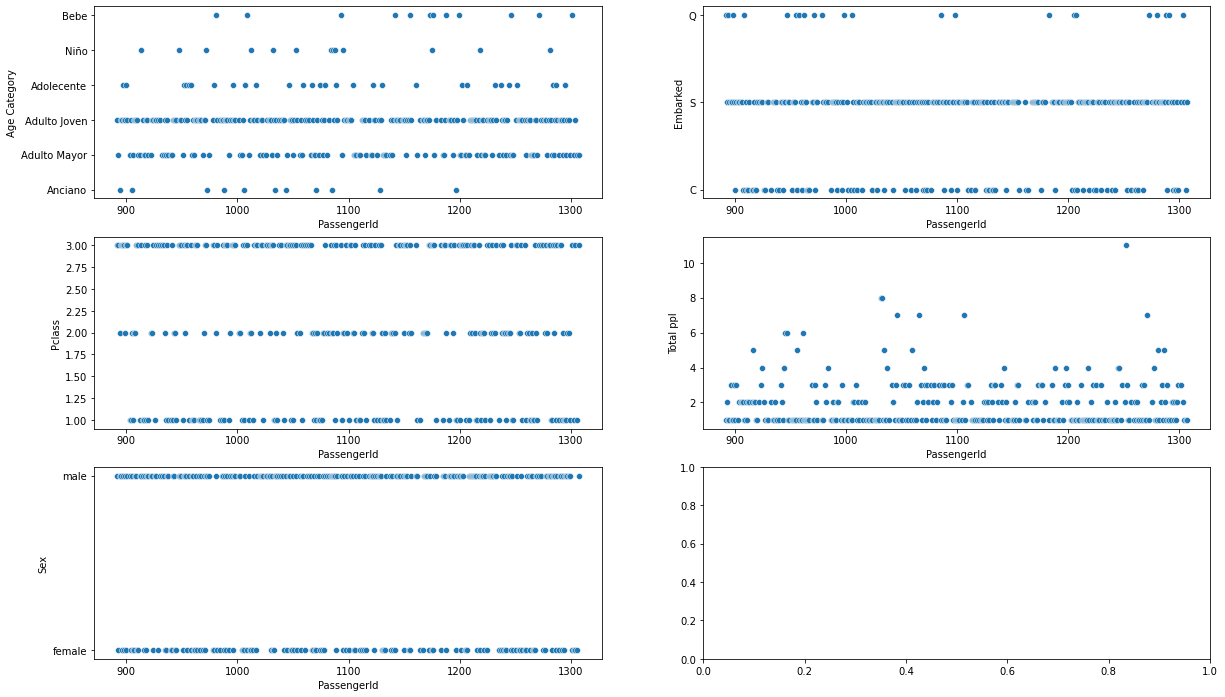

In [69]:
# Observar outliers de df_test
fig, axes = plt.subplots(3, 2, figsize=(20,12))
sns.scatterplot(x='PassengerId', y='Age Category', data=df_test, ax=axes[0, 0])
sns.scatterplot(x='PassengerId', y='Pclass', data=df_test, ax=axes[1, 0])
sns.scatterplot(x='PassengerId', y='Sex', data=df_test, ax=axes[2, 0])
sns.scatterplot(x='PassengerId', y='Embarked', data=df_test, ax=axes[0, 1])
sns.scatterplot(x='PassengerId', y='Total ppl', data=df_test, ax=axes[1, 1])

In [70]:
# Observamos que hay un outlier de la cantidad de personas en 'Total ppl'
print(df_test[df_test['Total ppl'] > 8])

             Pclass   Sex Embarked  Total ppl Age Category
PassengerId                                               
1252              3  male        S         11   Adolecente


In [71]:
# Lo eliminaremos
df_test = df_test.drop(index=1252)

<AxesSubplot:xlabel='PassengerId', ylabel='Total ppl'>

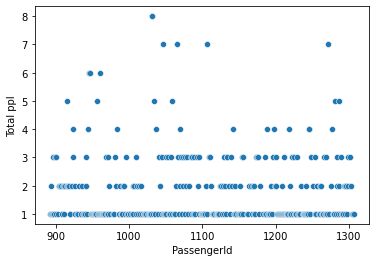

In [72]:
# Visualización de esto en el scatterplot
sns.scatterplot(x='PassengerId', y='Total ppl', data=df_test)

In [73]:
df_test.head()

,Pclass,Sex,Embarked,Total ppl,Age Category
PassengerId,,,,,
892,3,male,Q,1,Adulto Joven
893,3,female,S,2,Adulto Mayor
894,2,male,Q,1,Anciano
895,3,male,S,1,Adulto Joven
896,3,female,S,3,Adulto Joven


In [74]:
# Con los datos clasificados lo podemos convertir a variables dummy.
df_test = pd.get_dummies(df_test, columns = ["Sex"], drop_first = False)
df_test = pd.get_dummies(df_test, columns = ["Age Category"], drop_first = False)
df_test = pd.get_dummies(df_test, columns = ["Pclass"], drop_first = False)
df_test = pd.get_dummies(df_test, columns = ["Embarked"], drop_first = False)

In [75]:
df_test.head()

,Total ppl,Sex_female,Sex_male,Age Category_Bebe,Age Category_Niño,Age Category_Adolecente,Age Category_Adulto Joven,Age Category_Adulto Mayor,Age Category_Anciano,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,
892,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0
893,2,1,0,0,0,0,0,1,0,0,0,1,0,0,1
894,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0
895,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1
896,3,1,0,0,0,0,1,0,0,0,0,1,0,0,1


In [76]:
df.head()

,Survived,Total ppl,Sex_female,Sex_male,Age Category_Bebe,Age Category_Niño,Age Category_Adolescente,Age Category_Adulto Joven,Age Category_Adulto Mayor,Age Category_Anciano,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,
1,0,2,0,1,0,0,0,1,0,0,0,0,1,0,0,1
2,1,2,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1
4,1,2,1,0,0,0,0,1,0,0,1,0,0,0,0,1
5,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1


In [84]:
# Importar las librerías necesarias
import graphviz
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [78]:
# Tamaño de entrenamiento y prueba
seed = 1800
testp = 0.25

# Variable objetivo
df_y = df['Survived']
df_x = df.drop('Survived',axis=1)

In [80]:
#Dividimos nuestros datos para 
x, x_test, y, y_test = train_test_split(df_x, df_y, test_size=testp, random_state=seed)

In [81]:
# Random Forest Classifier
model = RandomForestClassifier(n_estimators = 20,random_state = seed)
model.fit(x,y)

RandomForestClassifier(n_estimators=20, random_state=1800)

In [82]:
# Realizamos las predicciones
y_pred = model.predict(x_test)

In [83]:
print('Accuracy', accuracy_score(y_test,y_pred))

Accuracy 0.8202247191011236


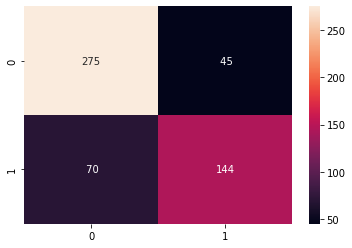

In [86]:
# Realizamos una matriz de confusión
yy = cross_val_predict(model,x,y,cv=10)
sns.heatmap(confusion_matrix(y,yy),annot = True,fmt='3.0f')
plt.show()

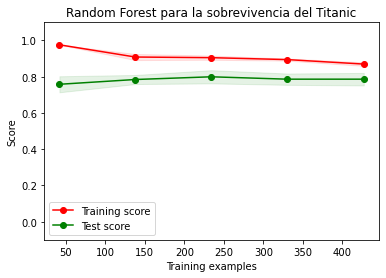

In [88]:
# Queremos observar el learning curve de nuestro modelo 
train_sizes, train_scores, test_scores = learning_curve(model, x, y, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
    
plt.figure()
plt.title("Random Forest para la sobrevivencia del Titanic")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.gca().invert_yaxis()
    
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")
plt.legend(loc="best")
    
plt.ylim(-.1,1.1)
plt.show()